In [ ]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score

In [ ]:
df= pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [ ]:
1. GenHlth
2. Age
3. BMI
4. Education
5. CholCheck
6. Income
7. AnyHealthcare
8. HighBP
9. Veggies
10. HighChol

SyntaxError: invalid syntax (282990813.py, line 1)

## How these Variables affact the HeartDiseaseorAttack under different level of age

In [ ]:
def odds_trend_Age(feature,dataframe):
    df = dataframe.copy()
    table = pd.crosstab(df['Age'], [df[feature], df['HeartDiseaseorAttack']], margins=False)
    age = np.arange(1, 14)
    # Create a color map that maps each feature to a unique color
    color_map = plt.get_cmap('plasma')
    plt.figure(figsize=(8,6))
    # Loop over each level of GenHlth and plot the data for that level
    for i, level in enumerate(sorted(df_copy[feature].unique())):
        temp = table.loc[:,level][1] / table.loc[:,level][0] 
        # Create the data for the dot plot
        color = color_map(i / df[feature].unique().shape[0])
        plt.scatter(age, temp.values, marker='o', color=color, label=level)

    # Add a legend to the plot
    plt.legend(bbox_to_anchor=(1.25, 1),title=feature)
    # Add labels and title
    plt.xlabel('Age')
    plt.ylabel('Odds')
    plt.title('How '+ feature + ' affact the HeartDiseaseorAttack under different level of age')
    # Display the plot
    plt.show()
    

In [ ]:
def odds_trend_Age(feature, dataframe):
    df = dataframe.copy()
    table = pd.crosstab(df['Age'], [df[feature], df['HeartDiseaseorAttack']], margins=False)
    age = np.arange(1, 14)
    # Create a color map that maps each feature to a unique color
    color_map = plt.get_cmap('plasma')
    
    # Create subplots with shared y-axis
    fig, ax = plt.subplots(figsize=(8, 6), sharey=True)
    
    # Loop over each level of the feature and plot the data for that level
    for i, level in enumerate(sorted(df[feature].unique())):
        temp = table.loc[:, level][1] / table.loc[:, level][0]
        # Create the data for the dot plot
        color = color_map(i / df[feature].unique().shape[0])
        ax.scatter(age, temp.values, marker='o', color=color, label=level)

    # Add a legend to the plot
    ax.legend(bbox_to_anchor=(1.25, 1))
    # Add labels and title
    ax.set_xlabel('Age')
    ax.set_ylabel('Odds')
    ax.set_title('How ' + feature + ' affects HeartDiseaseorAttack under different levels of age')

    # Display the plot
    plt.show()


### set a range for BMI as categorical 

In [ ]:
# Define the bin edges for the BMI categories
bin_edges = [0,18.5, 24.9, 29.9, float('inf')]
df_copy = df.copy()
# Use pd.cut() to make the age variable categorical
df_copy['BMI'] = pd.cut(df_copy['BMI'], bins=bin_edges)
df_copy

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,"(29.9, inf]",1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,"(24.9, 29.9]",1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,"(24.9, 29.9]",0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,"(24.9, 29.9]",0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,"(18.5, 24.9]",0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,"(29.9, inf]",0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,"(0.0, 18.5]",0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,"(24.9, 29.9]",0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,"(18.5, 24.9]",0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


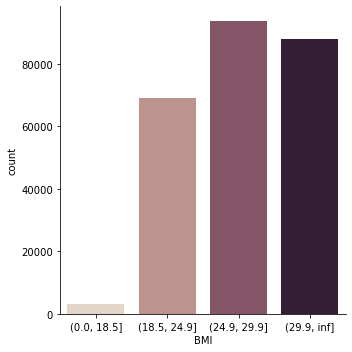

In [ ]:
sns.catplot(data=df_copy, x="BMI", kind="count", palette="ch:.25")

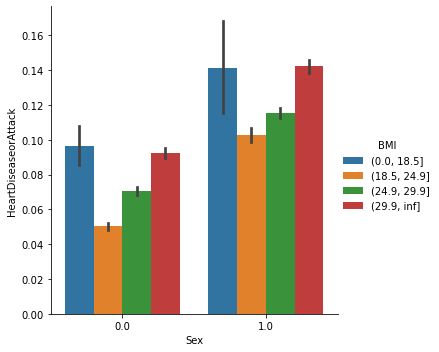

In [ ]:
sns.catplot(data=df_copy, x="Sex", y="HeartDiseaseorAttack", hue="BMI", kind="bar")

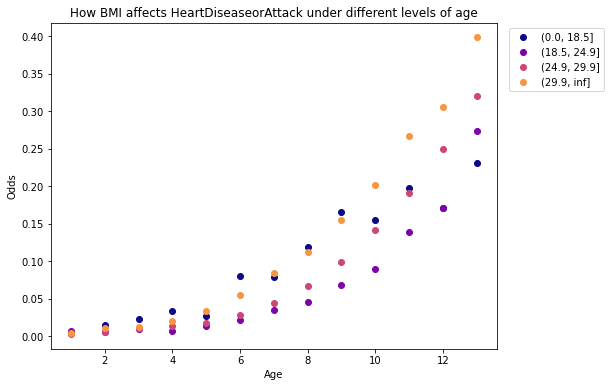

BMI                  (0.0, 18.5]     (18.5, 24.9]       (24.9, 29.9]        \
HeartDiseaseorAttack         0.0 1.0          0.0   1.0          0.0   1.0   
Age                                                                          
1.0                          176   1         2626    18         1636     5   
2.0                          139   2         2759    16         2466    13   
3.0                          132   3         3474    32         3697    43   
4.0                          148   5         3935    27         4640    62   
5.0                          146   4         4282    57         5520    95   
6.0                          163  13         4903   108         6827   196   
7.0                          242  19         6286   217         9187   411   
8.0                          303  36         7190   328        10575   709   
9.0                          289  48         7562   515        11307  1126   
10.0                         315  49         7073   631        10679  1515   
11.0                         223  44         5227   724         7888  1510   
12.0                         216  37         3858   661         5221  1300   
13.0                         304  70         5059  1385         5392  1729   

BMI                  (29.9, inf]        
HeartDiseaseorAttack         0.0   1.0  
Age                                     
1.0                         1233     5  
2.0                         2180    23  
3.0                         3694    48  
4.0                         4907    99  
5.0                         5858   195  
6.0                         7214   395  
7.0                         9174   778  
8.0                        10511  1180  
9.0                        10728  1669  
10.0                        9934  1998  
11.0                        6248  1669  
12.0                        3592  1095  
13.0                        2449   975

In [ ]:
odds_trend_Age('BMI',df_copy)
pd.crosstab(df_copy['Age'], [df_copy['BMI'], df_copy['HeartDiseaseorAttack']], margins=False)

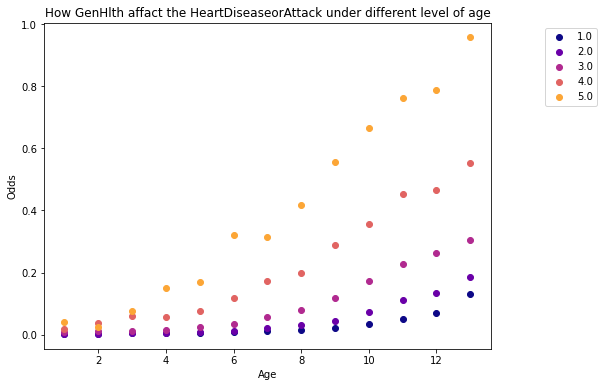

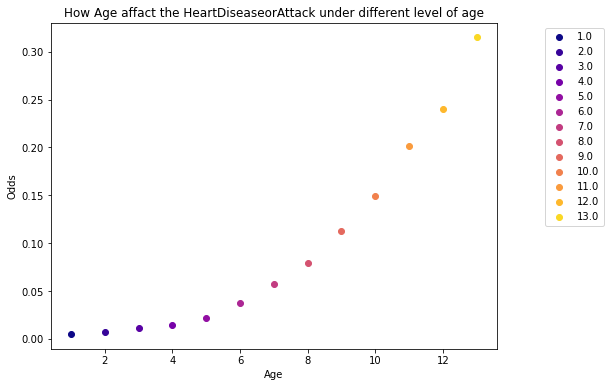

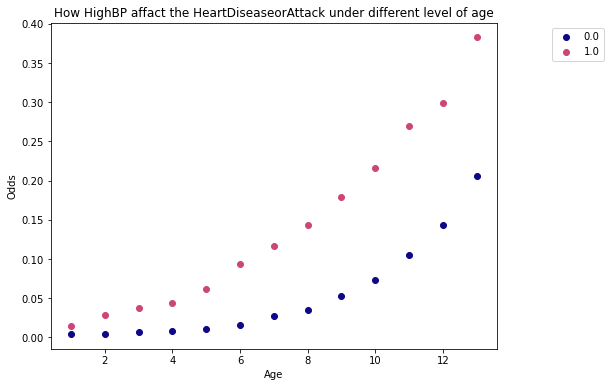

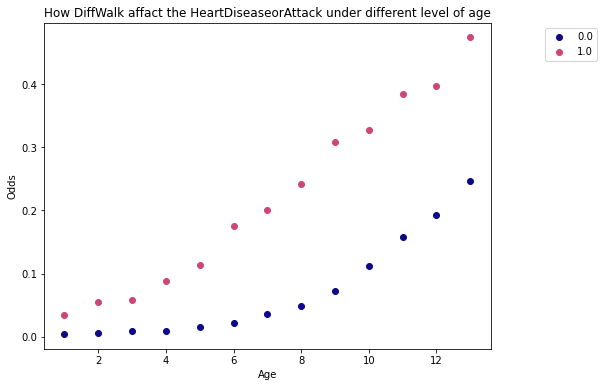

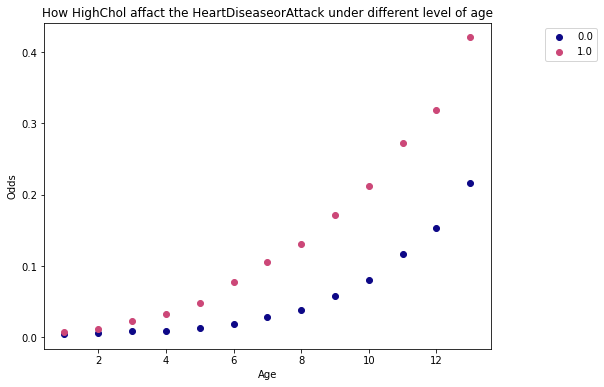

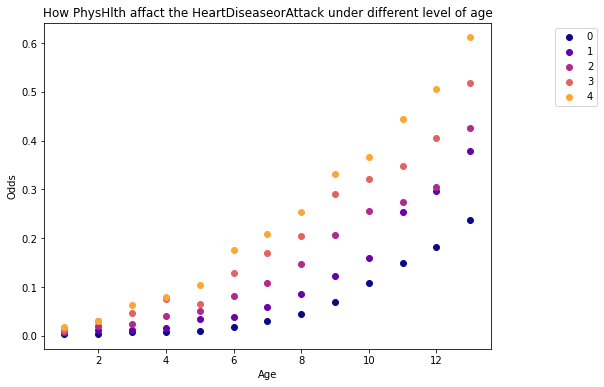

In [ ]:
low_entropy_var = ['GenHlth','Age','HighBP','DiffWalk','HighChol','PhysHlth']
for feature in low_entropy_var:
    odds_trend_Age(feature,df_copy)

### Group by Gender 

In [ ]:
df= pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [ ]:
df_copy = df.copy()

# define the bin edges and labels
bins = [0, 18.5, 24.9, 29.9, float("inf")]
labels = [1, 2, 3, 4]

menbins = [0, 1, 7, 14, 21, float('inf')]
menlabs = [0, 1, 2, 3, 4]

phybins = [0, 1, 7, 14, 21, float('inf')]
phylabs = [0, 1, 2, 3, 4]

# categorize the BMI column into 4 levels
df_copy["BMI"] = pd.cut(df_copy["BMI"], bins=bins, labels=labels)
df_copy["MentHlth"] = pd.cut(df_copy["MentHlth"], bins=menbins, labels=menlabs, include_lowest=True)
df_copy["PhysHlth"] = pd.cut(df_copy["PhysHlth"], bins=phybins, labels=phylabs, include_lowest=True)


df_copy.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,4,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,3,3,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,3,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0,0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,3,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,4,4,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,3,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0,0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,2,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,1,0,0.0,0.0,11.0,5.0,4.0


In [ ]:
# group the data by gender
grouped = df_copy.groupby('Sex')

# create a new DataFrame for each group
male_df = grouped.get_group(1)
female_df = grouped.get_group(0)

In [ ]:
def odds_trend_Age(feature, dataframe, ax):
    df = dataframe.copy()
    table = pd.crosstab(df['Age'], [df[feature], df['HeartDiseaseorAttack']], margins=False)
    age = np.arange(1, 14)
    # Create a color map that maps each feature to a unique color
    color_map = plt.get_cmap('plasma')
    
    # Loop over each level of GenHlth and plot the data for that level
    for i, level in enumerate(sorted(df[feature].unique())):
        temp = table.loc[:,level][1] / table.loc[:,level][0] 
        # Create the data for the dot plot
        color = color_map(i / df[feature].unique().shape[0])
        ax.scatter(age, temp.values, marker='o', color=color, label=level)
    
    # Add a legend to the plot
    ax.legend(bbox_to_anchor=(1.3, 1),title=feature)

    # Add labels and title
    ax.set_xlabel('Age')
    ax.set_ylabel('Odds')
    ax.set_title( feature + ' affects HD under different levels of Age')

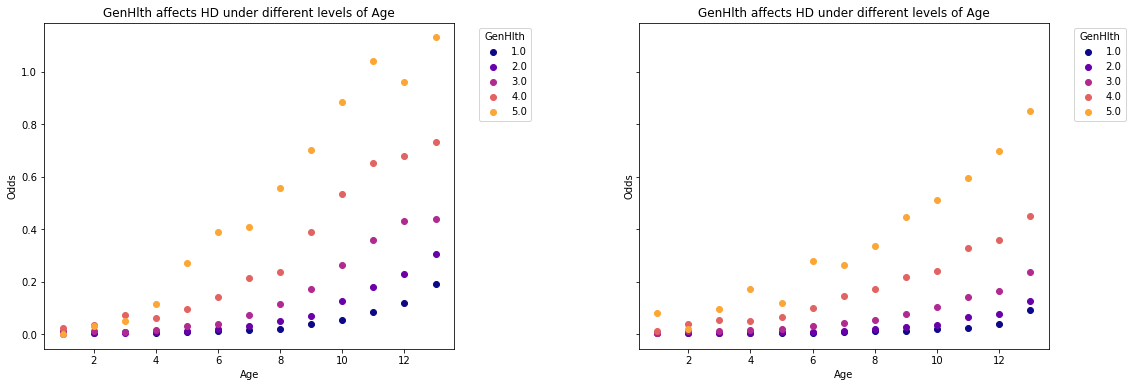

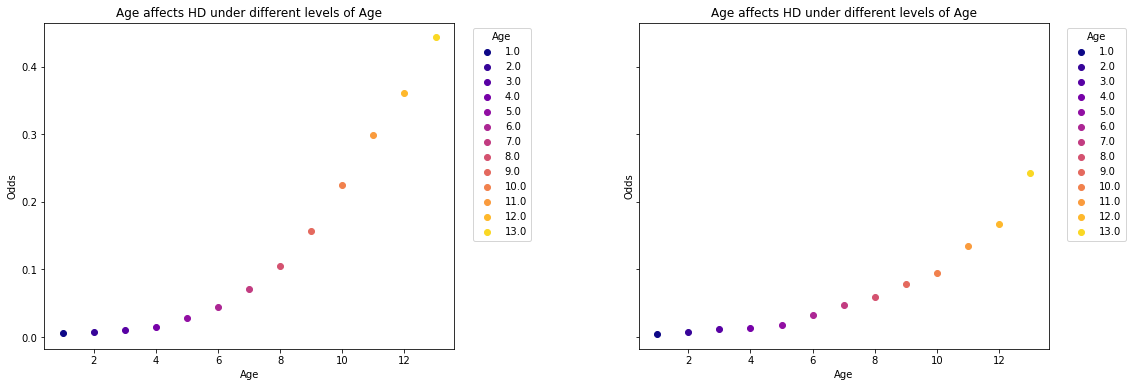

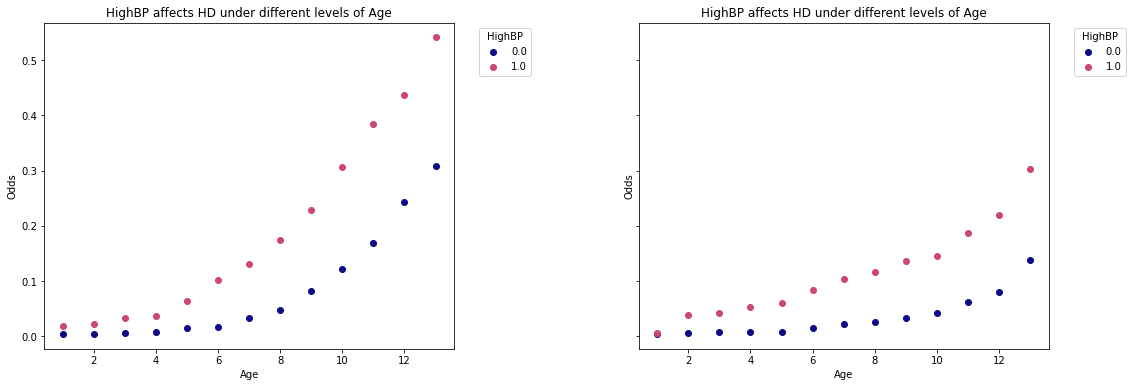

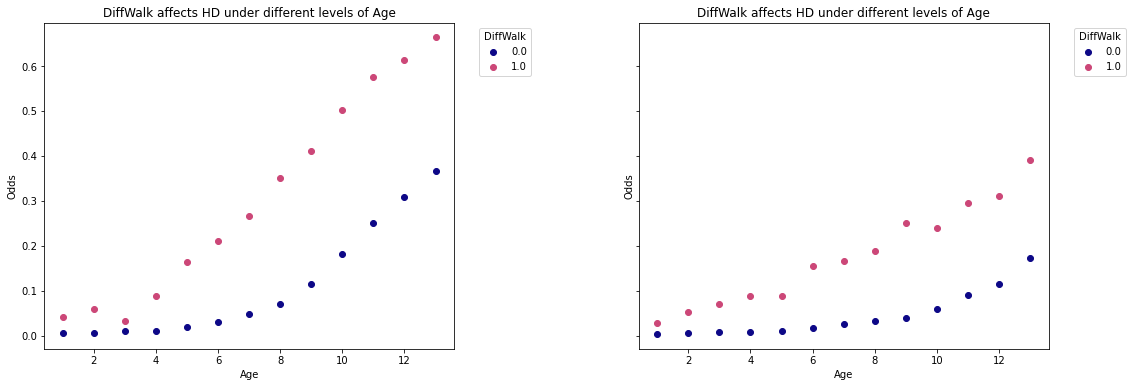

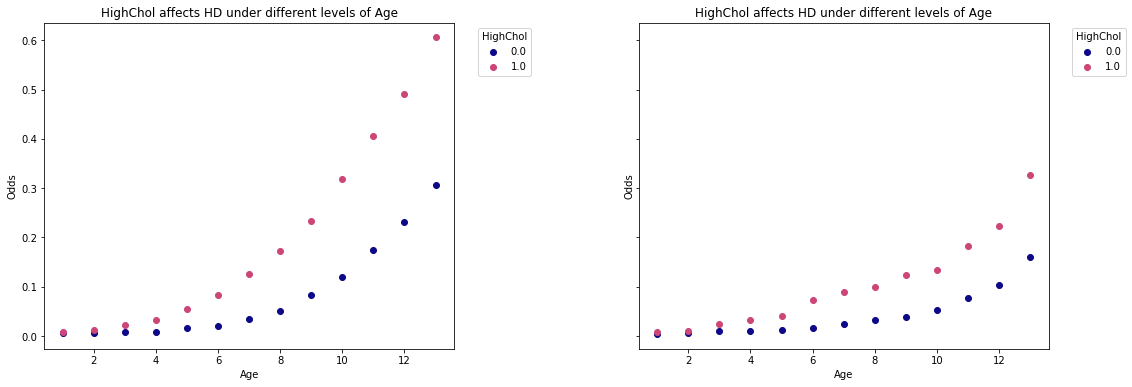

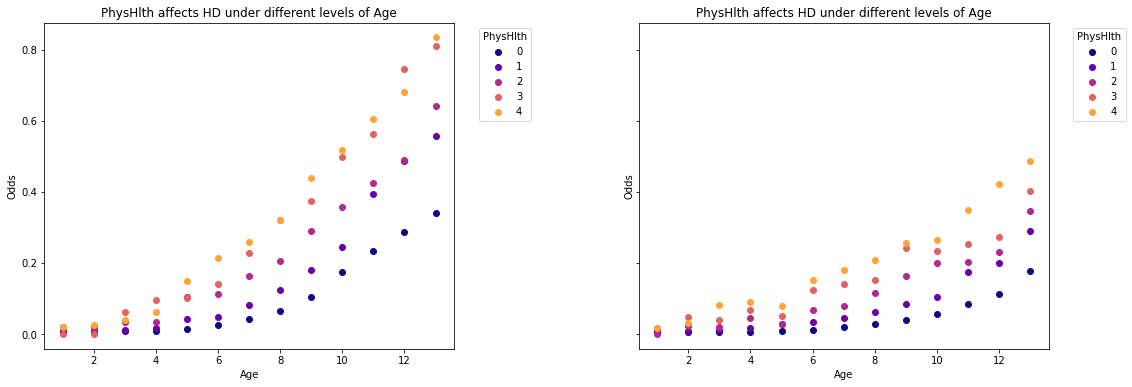

In [ ]:
low_entropy_var = ['GenHlth','Age','HighBP','DiffWalk','HighChol','PhysHlth']
for feature in low_entropy_var:
    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'wspace': 0.45}, sharey=True)
    # Call the function for each subplot
    odds_trend_Age(feature, male_df, ax1)
    odds_trend_Age(feature, female_df, ax2)

    # Adjust the overlap between the subplots
    plt.subplots_adjust(wspace=0.4)

    # Display the plots
    plt.show()

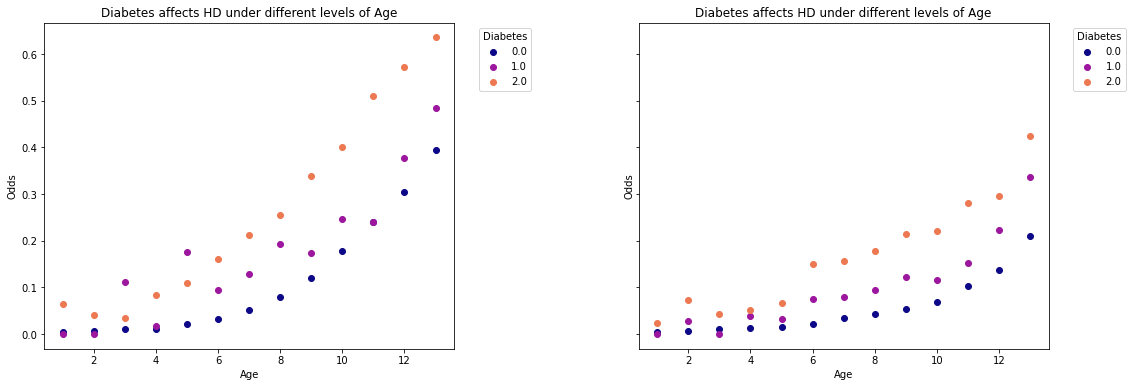

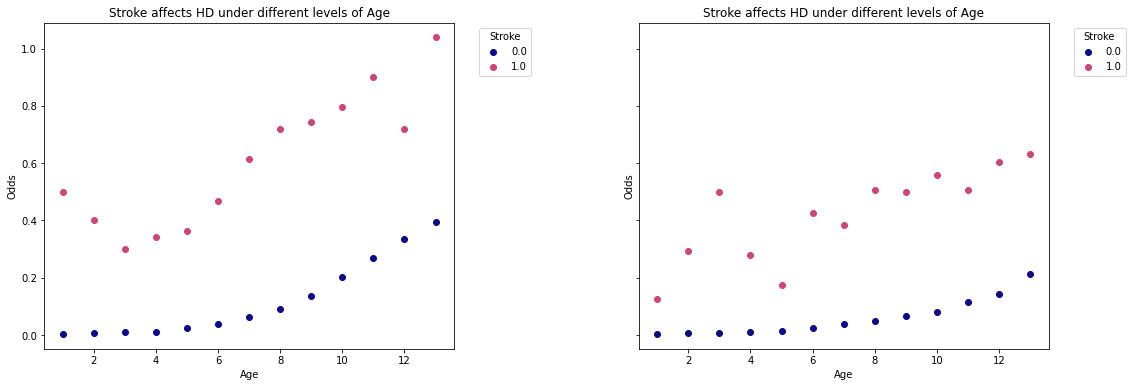

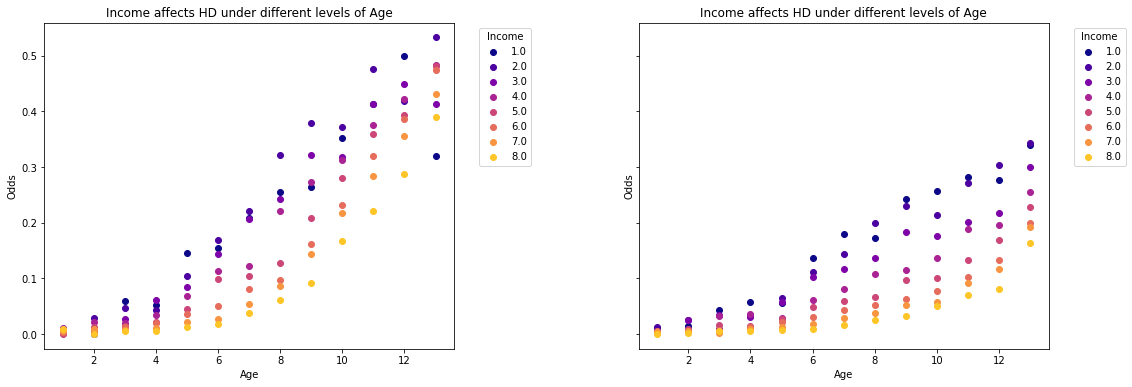

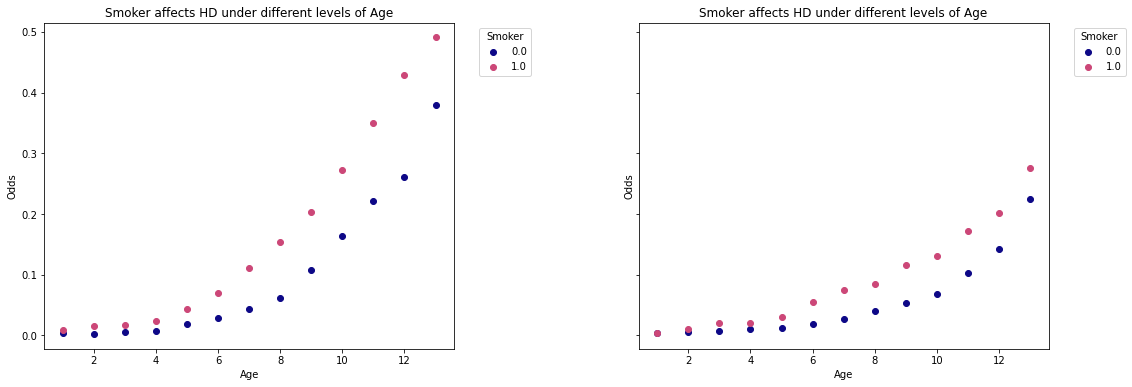

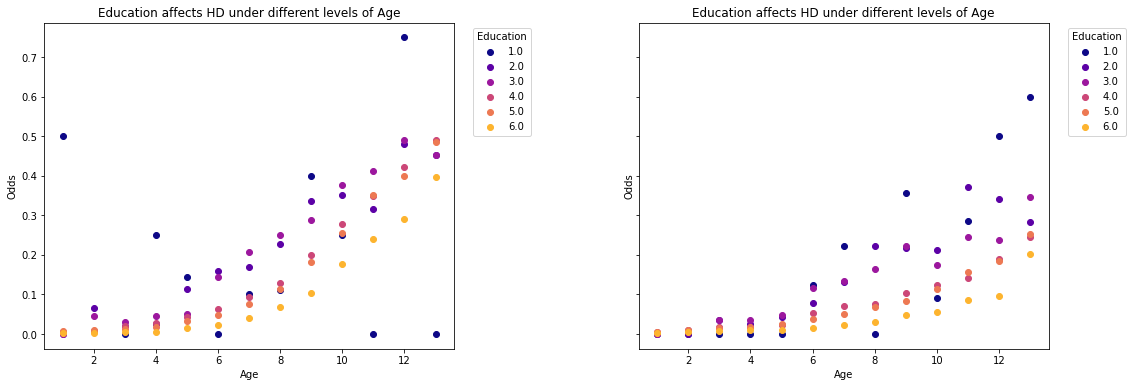

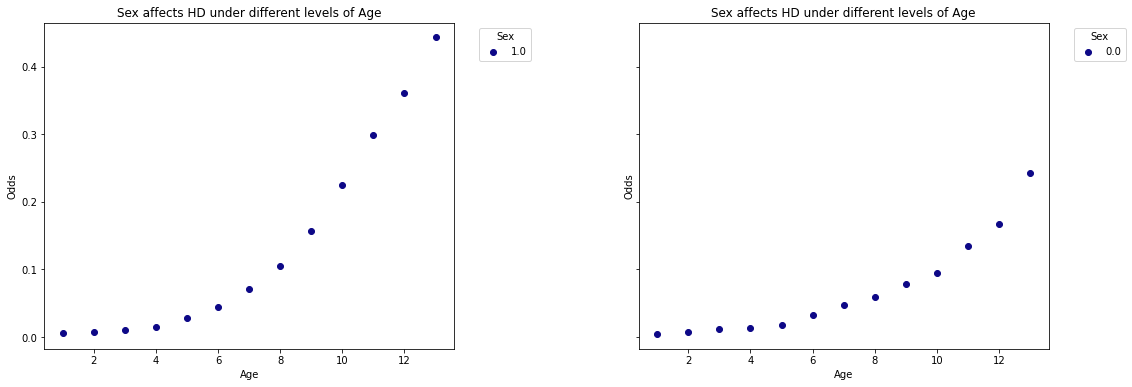

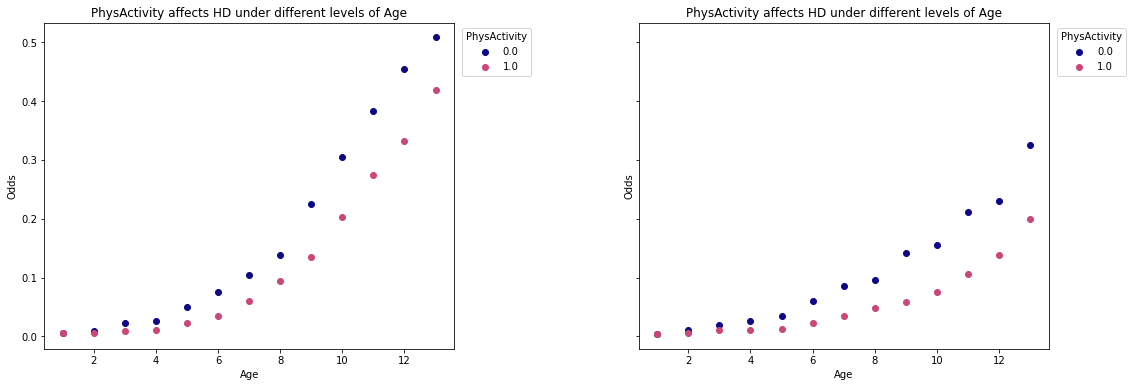

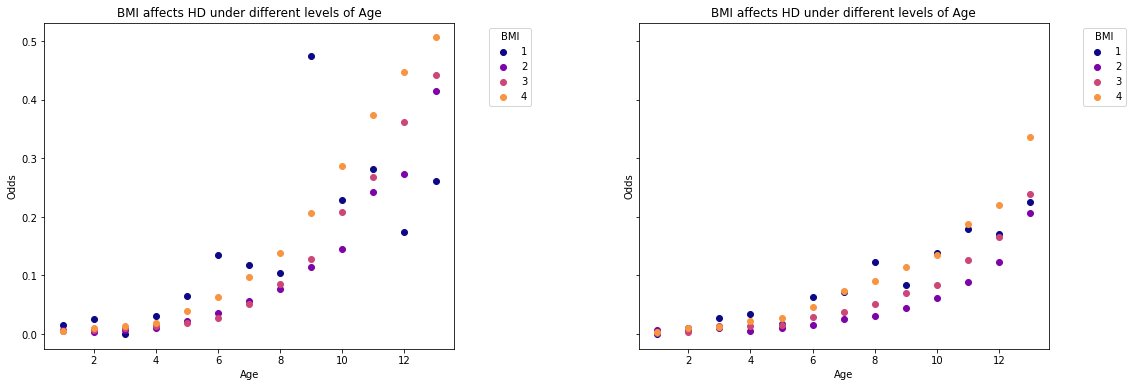

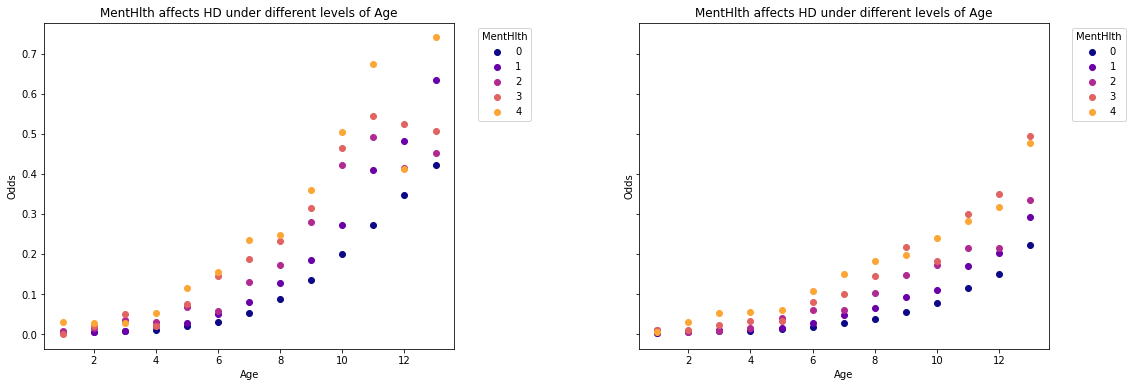

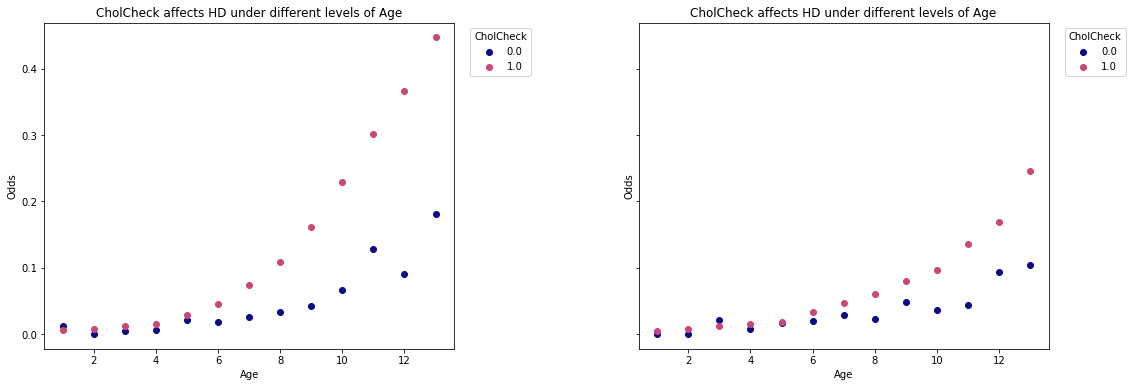

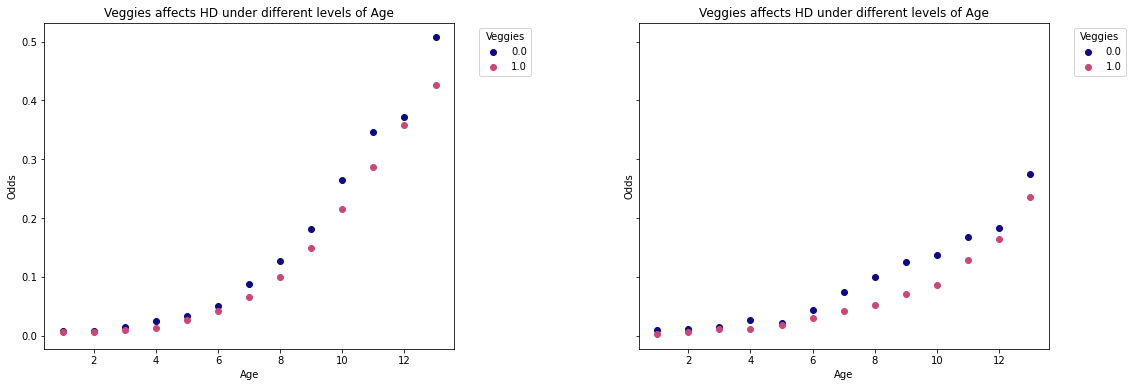

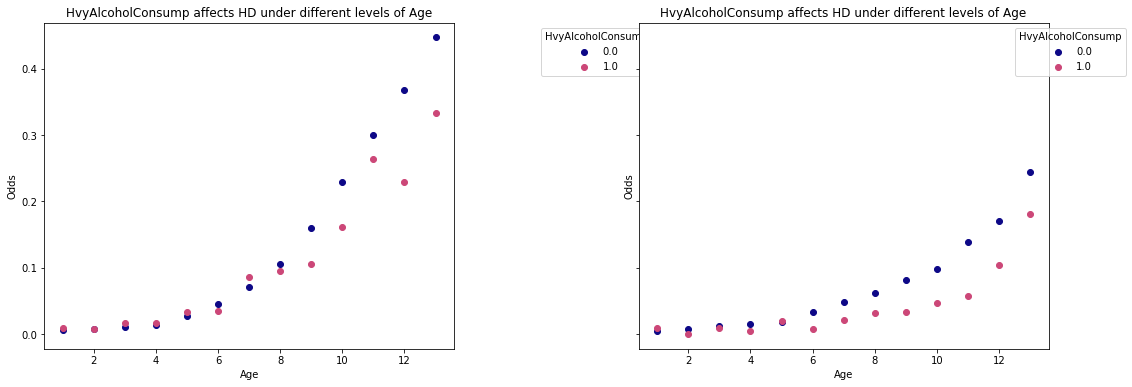

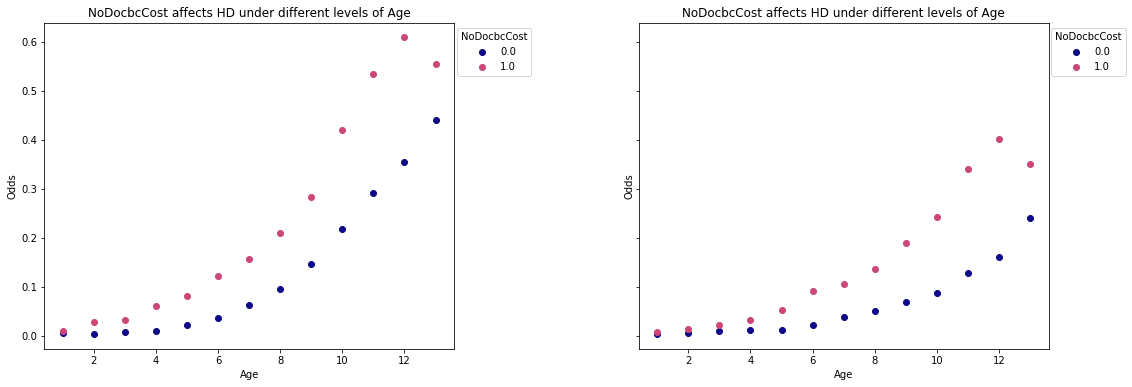

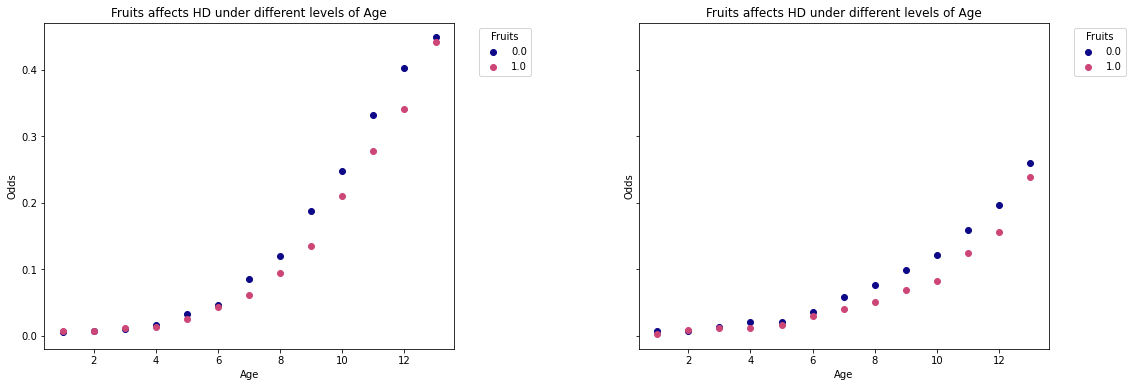

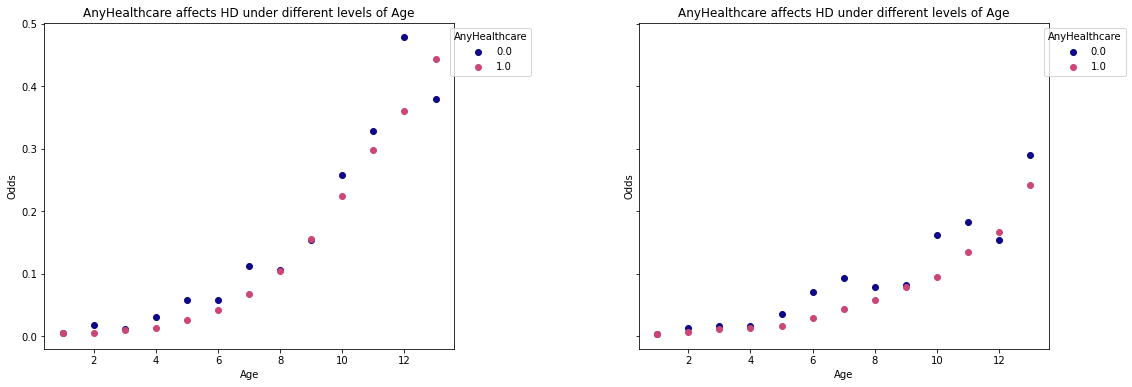

In [ ]:
remain_entropy_var = ['Diabetes', 'Stroke','Income', 'Smoker', 'Education', 'Sex', 'PhysActivity', 'BMI', 'MentHlth', 'CholCheck',
'Veggies', 'HvyAlcoholConsump', 'NoDocbcCost', 'Fruits', 'AnyHealthcare']
for feature in remain_entropy_var:
    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'wspace': 0.45}, sharey=True)
    # Call the function for each subplot
    odds_trend_Age(feature, male_df, ax1)
    odds_trend_Age(feature, female_df, ax2)

    # Adjust the overlap between the subplots
    plt.subplots_adjust(wspace=0.4)

    # Display the plots
    plt.show()

## Group by BMI

In [ ]:
# group the data by gender
grouped = df_copy.groupby('BMI')

# create a new DataFrame for each group
Underweight_df = grouped.get_group(1)
Normalweight_df = grouped.get_group(2)
Overweight_df = grouped.get_group(3)
Obesity_df = grouped.get_group(4)

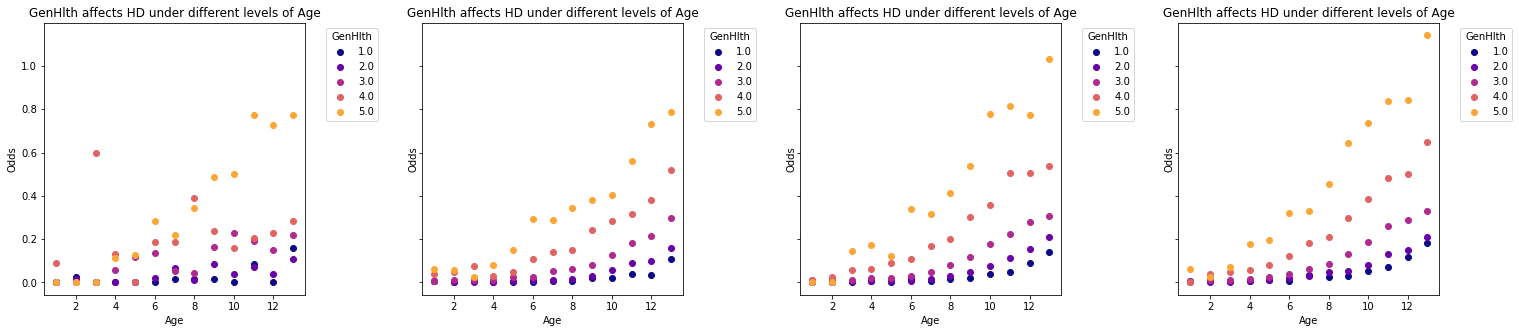

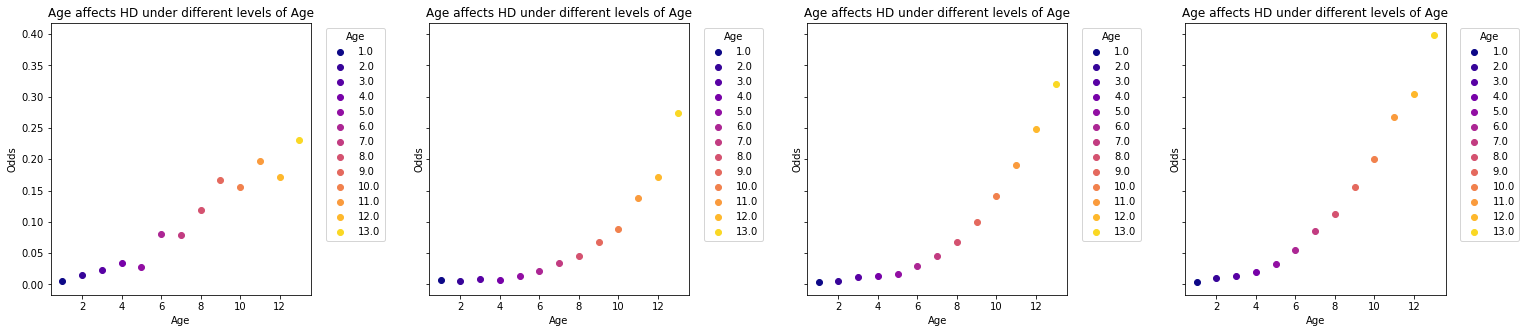

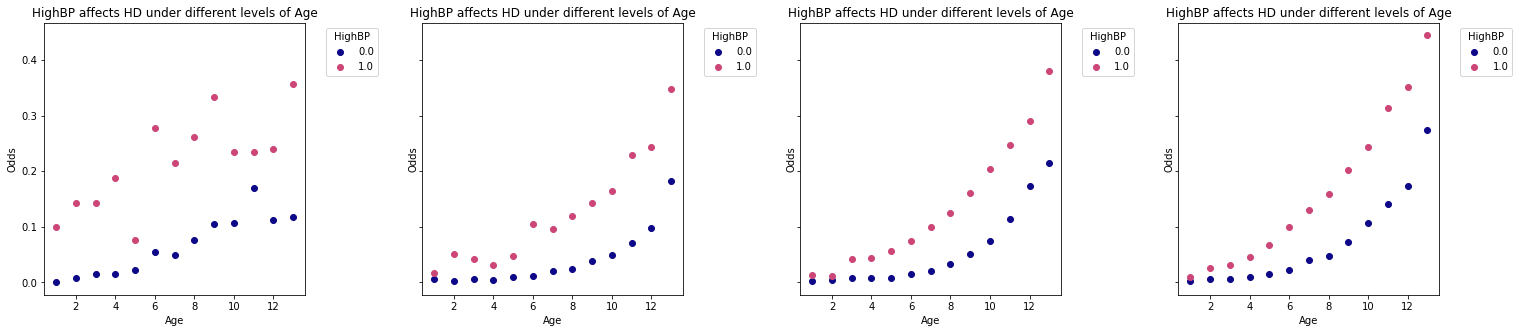

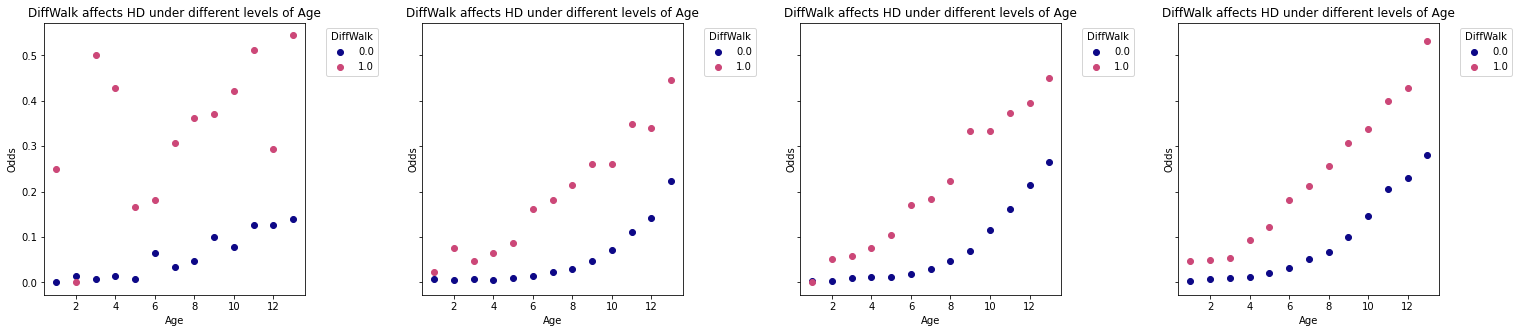

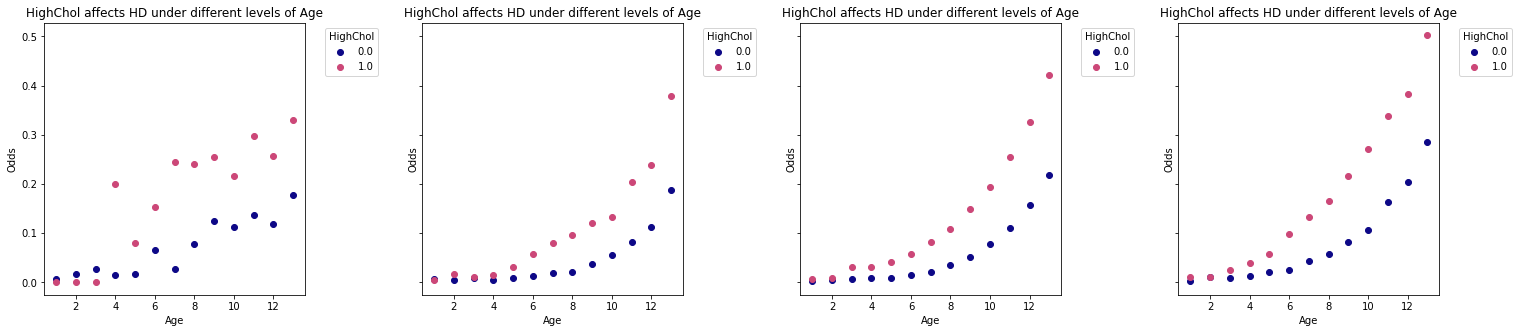

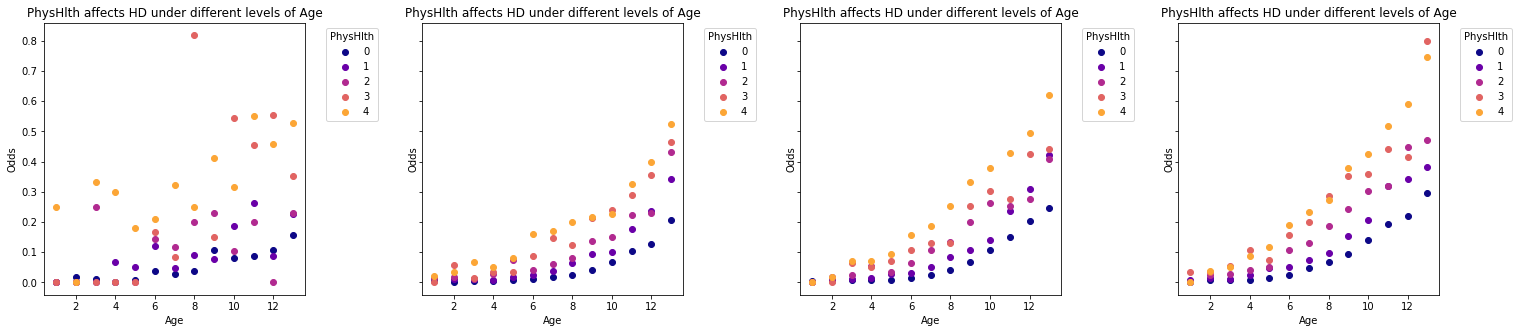

In [ ]:
#low_entropy_var = ['GenHlth','Education','CholCheck','Income','AnyHealthcare','HighBP','Veggies','HighChol','DiffWalk','Age']
for feature in low_entropy_var:
    # Create a figure with two subplots side by side
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(25, 5), gridspec_kw={'wspace': 0.45, 'hspace': 0.45}, sharey=True)
    

    # Call the function for each subplot
    odds_trend_Age(feature, Underweight_df, ax1)
    odds_trend_Age(feature, Normalweight_df, ax2)
    odds_trend_Age(feature, Overweight_df, ax3)
    odds_trend_Age(feature, Obesity_df, ax4)

    # Adjust the overlap between the subplots
    plt.subplots_adjust(wspace=0.4)

    # Display the plots
    plt.show()




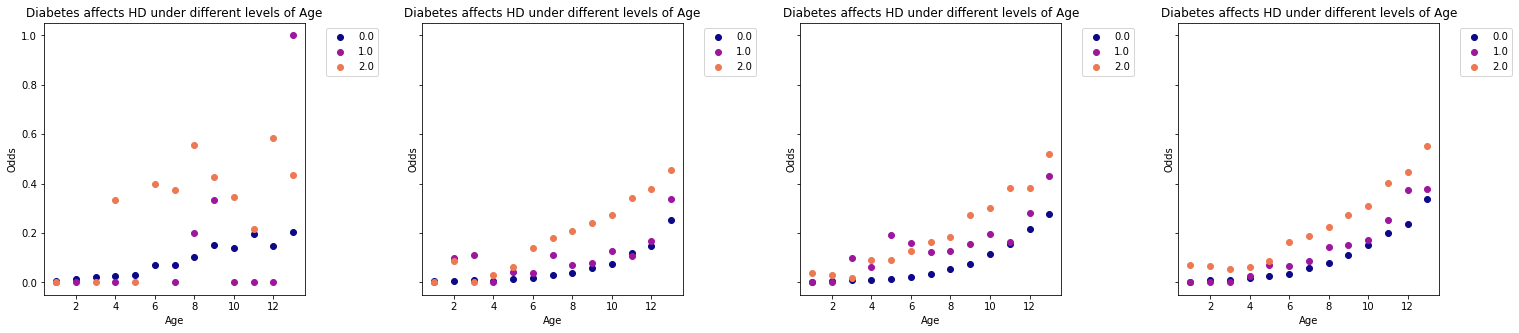

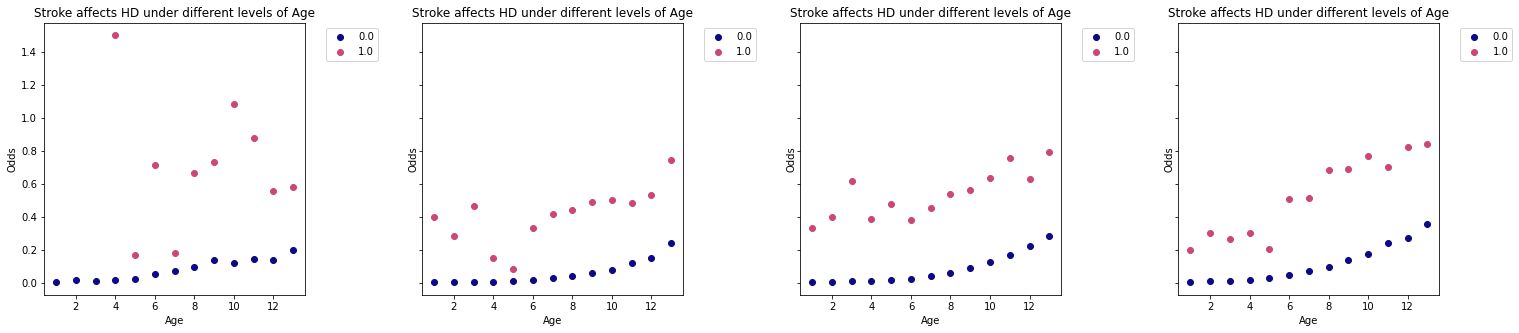

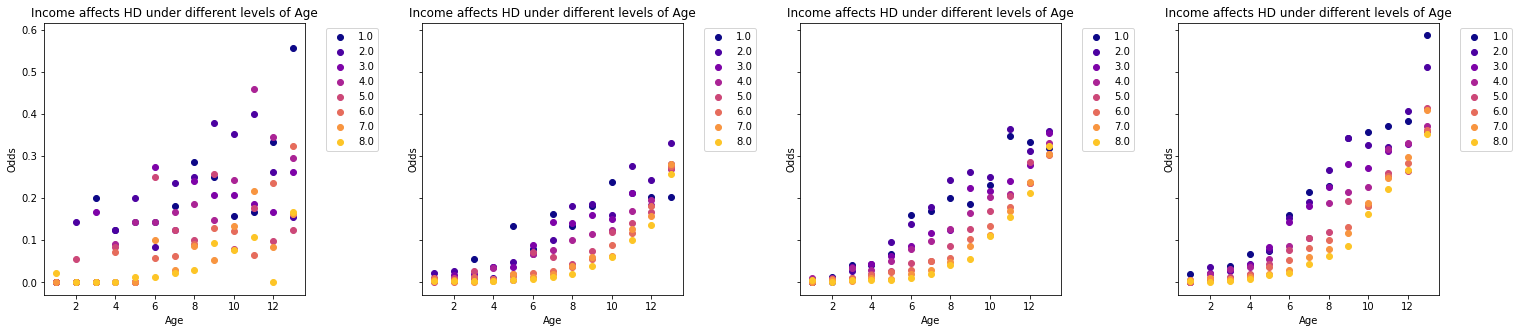

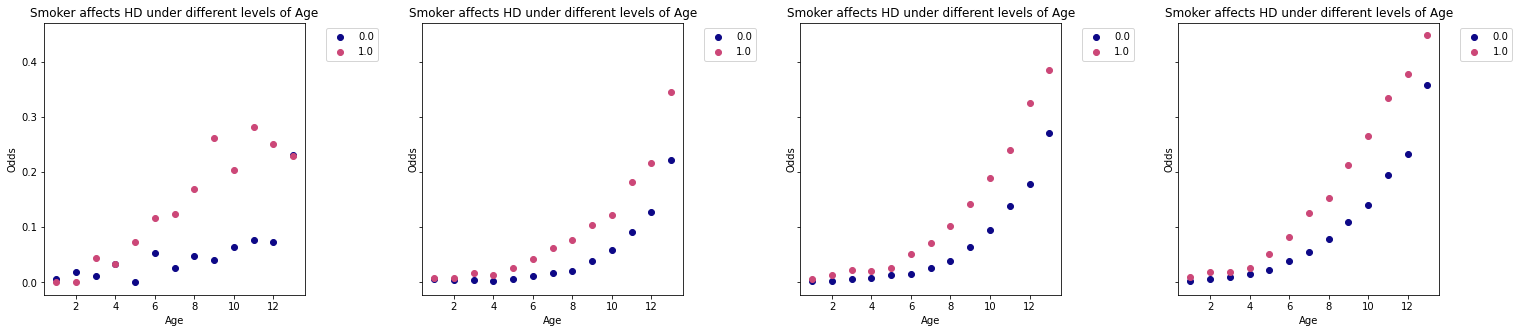

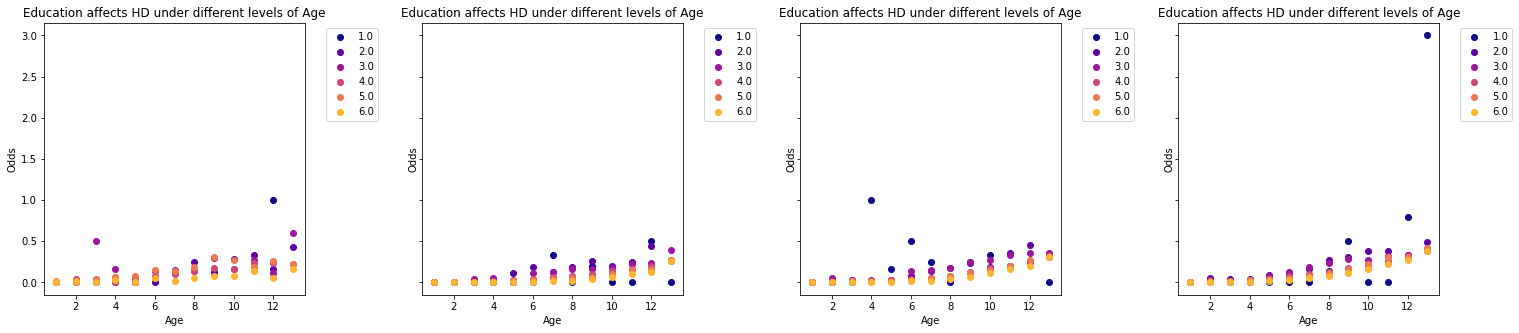

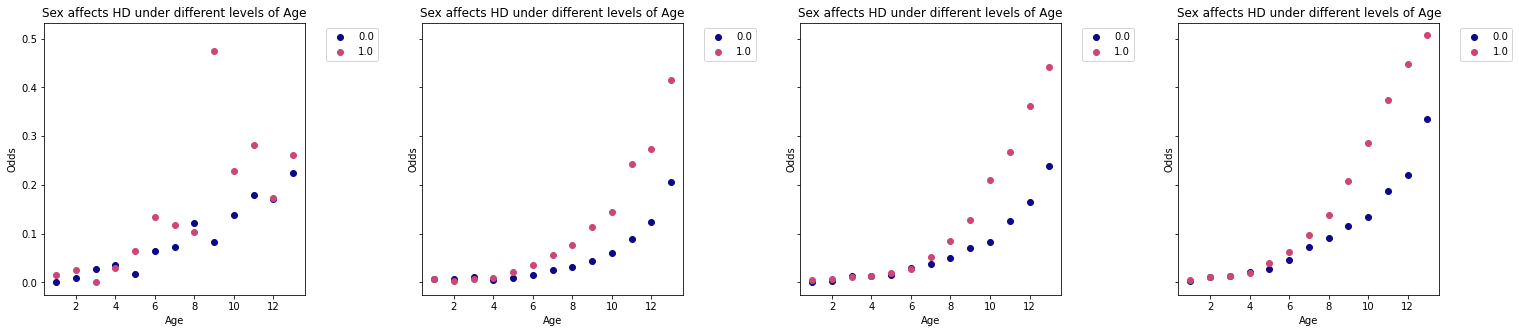

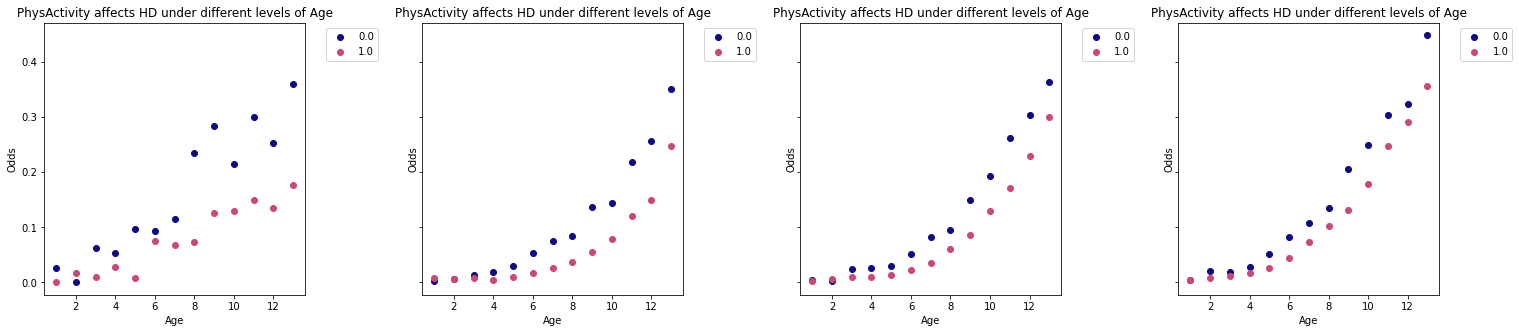

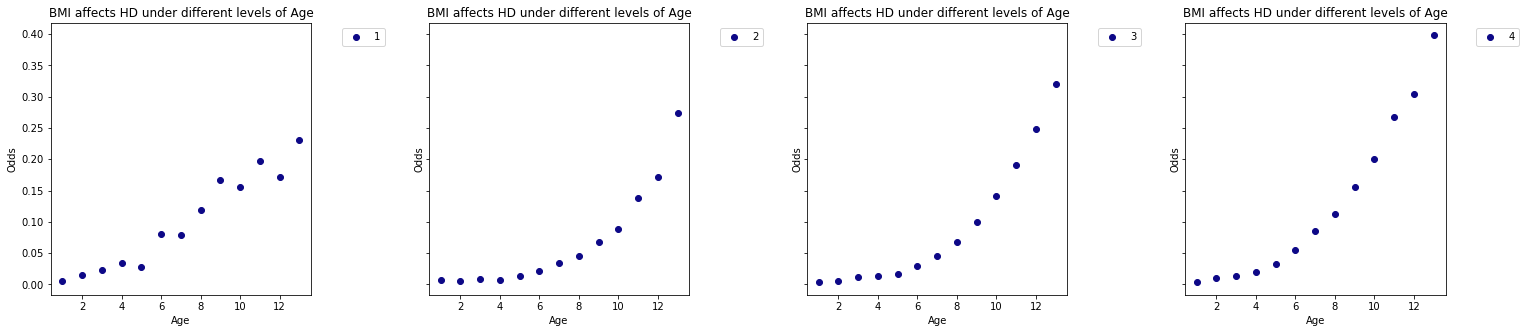

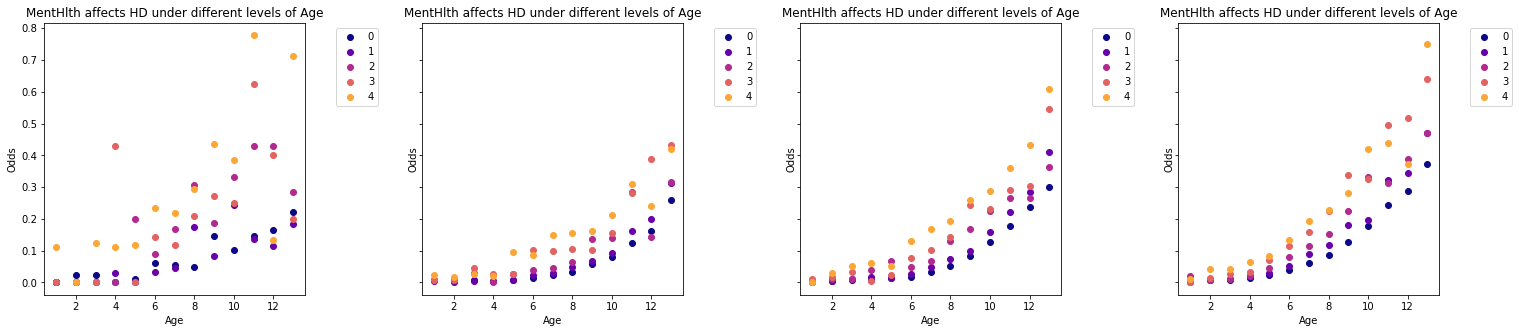

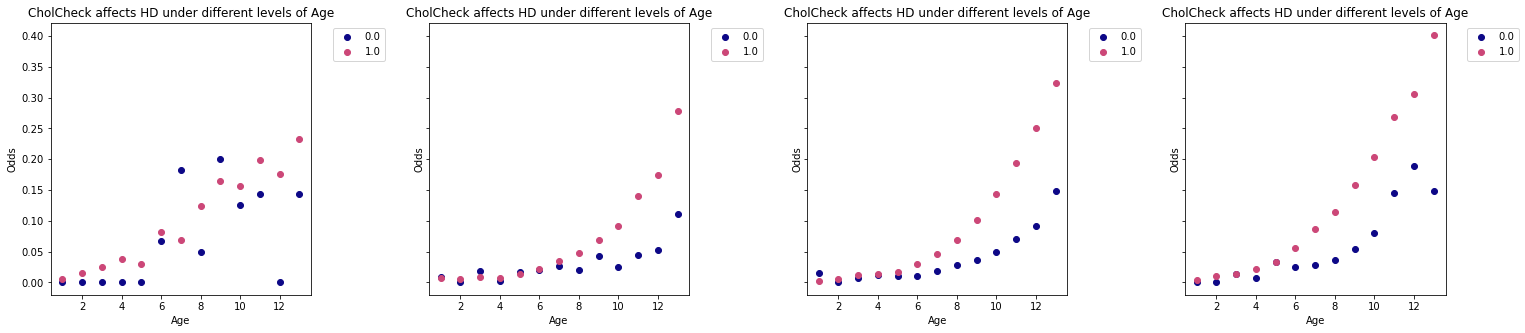

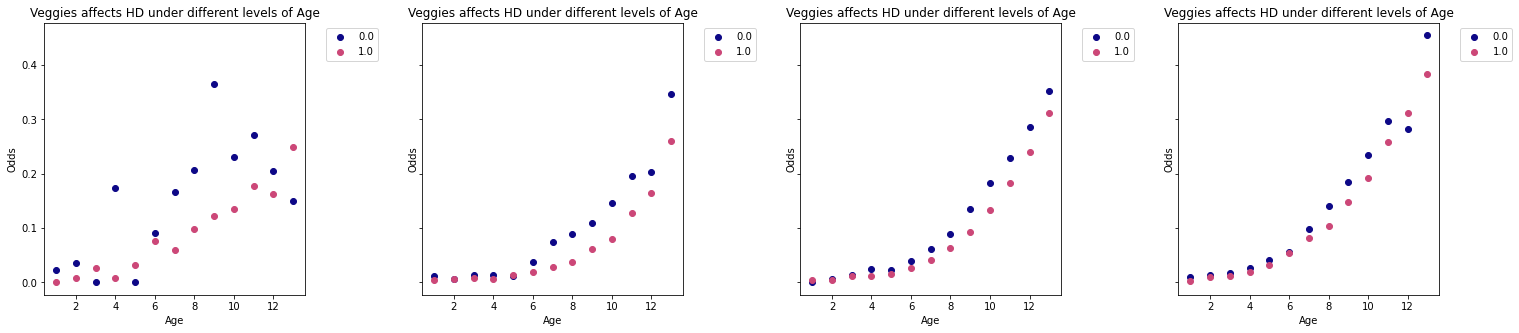

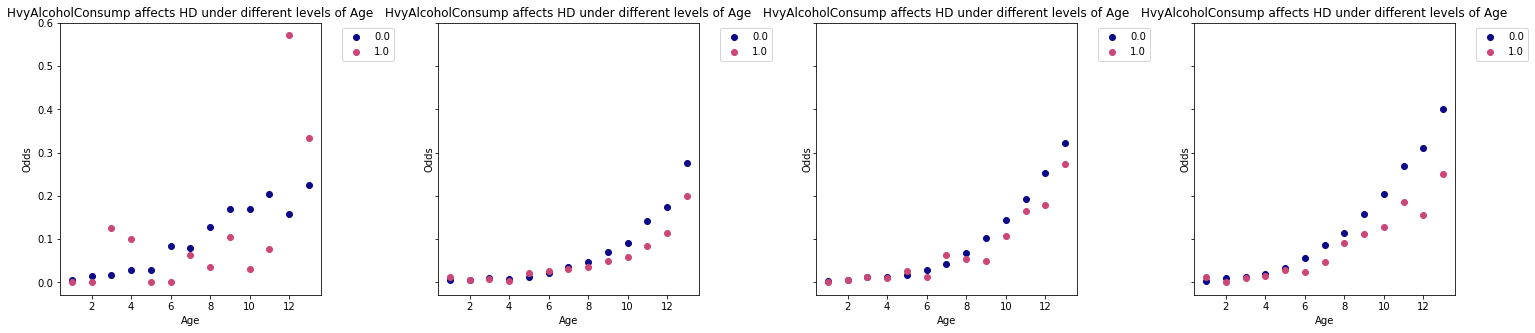

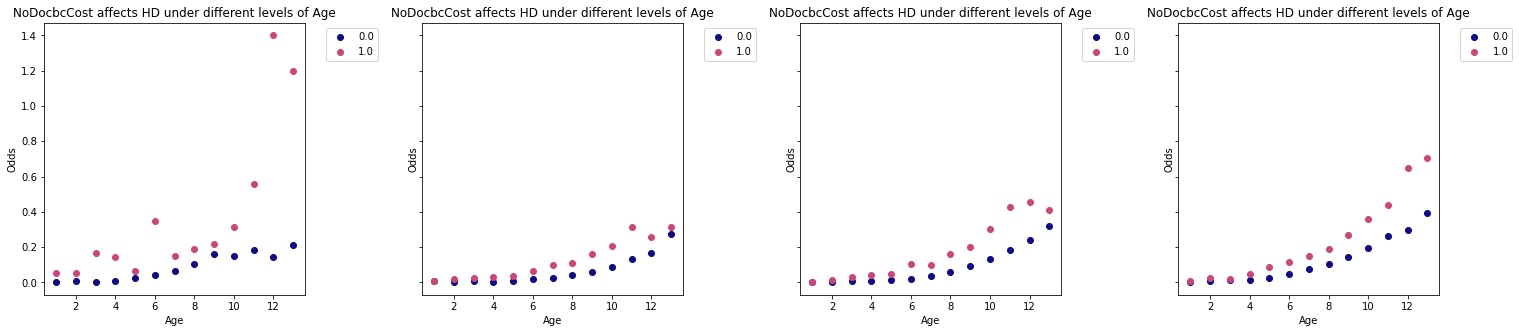

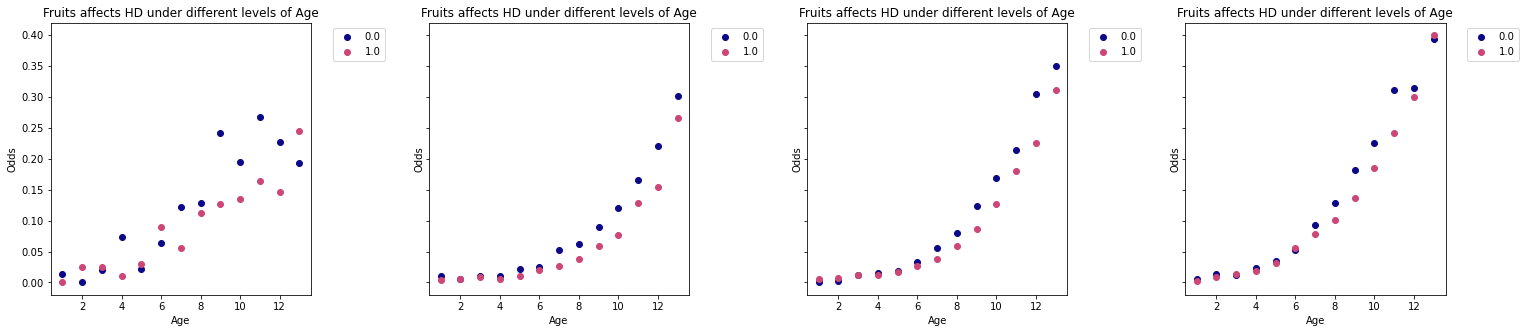

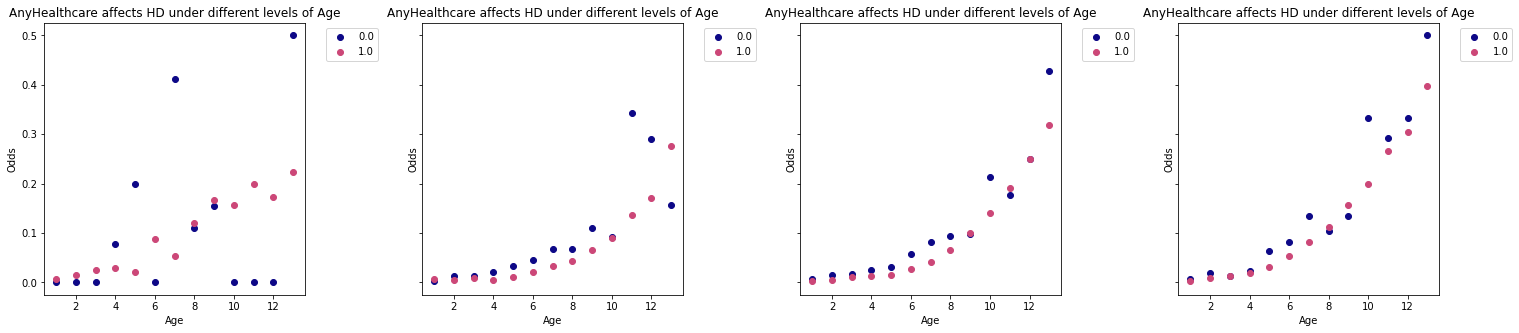

In [ ]:
#low_entropy_var = ['GenHlth','Education','CholCheck','Income','AnyHealthcare','HighBP','Veggies','HighChol','DiffWalk','Age']
for feature in remain_entropy_var:
    # Create a figure with two subplots side by side
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(25, 5), gridspec_kw={'wspace': 0.45, 'hspace': 0.45}, sharey=True)
    

    # Call the function for each subplot
    odds_trend_Age(feature, Underweight_df, ax1)
    odds_trend_Age(feature, Normalweight_df, ax2)
    odds_trend_Age(feature, Overweight_df, ax3)
    odds_trend_Age(feature, Obesity_df, ax4)

    # Adjust the overlap between the subplots
    plt.subplots_adjust(wspace=0.4)

    # Display the plots
    plt.show()
